In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import re
import os
import math

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
def add_cost(row):
    np = row['tp'] + row['fn']
    cost = row['fp'] * 1.0 + row['fn'] * 10.0
    #return cost/float(np)
    return cost

def add_f1(row):
    p = row['Precision']
    r = row['Recall']
    if r == 0.0:
        f1 = 0
    else:
        f1 = (2 * p * r)/(p + r)
    return f1

def filter_fn(row):
    np = row['tp'] + row['fn']
    percent = row['Percent']
    f1 = row['f1']
    return percent >= 5 and np >= 10 and f1 > 0.5
                         
dirname = os.getcwd()

group_fields = ['ProtocolName', 'GroupValues']
metric = 'ROC_AUC'
#metric = 'f1'
#metric = 'cost'

#file = 'classifiers_multiple_cutoff.csv'
#file = 'regression_to_multiple_classifier_cutoff.csv'
#file = 'regression_to_classifier_cutoffs.csv'
#file = 'regression_to_classifier_cutoffs_complete_range.csv'
file = 'regression_to_classifier_cutoffs_complete_range_f1_opt.csv'
classification_file = os.path.abspath(os.path.join(dirname, file))
adapt_cutoff_df = pd.read_csv(classification_file)
adapt_cutoff_df.GroupValues.fillna('NA', inplace=True)
#adapt_cutoff_df['f1'] = adapt_cutoff_df.apply(add_f1, axis=1)
adapt_cutoff_df['cost'] = adapt_cutoff_df.apply(add_cost, axis=1)
adapt_cutoff_df = adapt_cutoff_df[adapt_cutoff_df.apply(filter_fn, axis=1)]
assert (not adapt_cutoff_df.isnull().values.any())
if metric == 'cost':
    best_indices = adapt_cutoff_df.groupby(group_fields)[metric].idxmin()
else:
    best_indices = adapt_cutoff_df.groupby(group_fields)[metric].idxmax()
adapt_cutoff_best_df=adapt_cutoff_df.loc[best_indices]
#adapt_cutoff_best_df.sort_values(group_fields)

In [21]:
#adapt_cutoff_df.sort_values(group_fields)
adapt_cutoff_df.columns

Index(['ProtocolName', 'LabelName', 'GroupValues', 'Size', 'Estimator',
       'ROC_AUC', 'ClassificationPointType', 'Direction', 'Threshold',
       'Accuracy', 'Precision', 'Recall', 'f1', 'Percent', 'tp', 'fp', 'tn',
       'fn', 'correlation', 'spearman', 'regressionFile', 'protocolFile',
       'cost'],
      dtype='object')

In [22]:
adapt_cutoff_best_df.sort_values(group_fields)

,ProtocolName,LabelName,GroupValues,Size,Estimator,ROC_AUC,ClassificationPointType,Direction,Threshold,Accuracy,...,Percent,tp,fp,tn,fn,correlation,spearman,regressionFile,protocolFile,cost
1161,5-HT Transporter,Ki,NA,166,Tanimoto Smile SVM regression,0.908221,Fixed,UP,7.736873,0.933735,...,11.0,11,4,144,7,0.696494,0.685027,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,74.0
9810,5-HT1A,Ki,NA,265,Poly Smile SVM fingerprints regression,0.925652,Fixed,UP,8.217925,0.947170,...,10.0,17,5,234,9,0.726966,0.708681,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,95.0
1928,5-HT1B,Ki,NA,201,Tanimoto Smile SVM regression,0.845197,Fixed,UP,6.508702,0.776119,...,28.0,46,35,110,10,0.554835,0.578740,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,135.0
12338,5-HT1D,Ki,NA,168,Poly Smile SVM fingerprints regression,0.864784,Fixed,UP,6.016926,0.809524,...,38.0,49,17,87,15,0.659523,0.636267,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,167.0
5398,5-HT2,Ki,NA,121,Poly Smile SVM fingerprints regression,0.922277,Fixed,UP,6.957051,0.867769,...,48.0,50,8,55,8,0.616557,0.670990,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,88.0
11982,5-HT2A,Ki,NA,319,Weka RF folded fingerprints regression,0.917588,Fixed,UP,7.585027,0.871473,...,32.0,89,27,189,14,0.774927,0.763372,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,167.0
7148,5-HT2B,Ki,NA,123,RBF Smile SVM descriptors regression,0.851960,Fixed,UP,6.854001,0.764228,...,48.0,55,25,39,4,0.595616,0.600303,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,65.0
9135,5-HT2C,Ki,NA,282,RBF libSVM folded fingerprints regression,0.898438,Fixed,UP,6.576012,0.801418,...,35.0,88,45,138,11,0.719000,0.721753,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,155.0
8456,5-HT3,Ki,NA,211,Tanimoto Smile SVM regression,0.970687,Fixed,UP,7.707089,0.962085,...,6.0,7,3,196,5,0.578808,0.380030,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,53.0
7,5-HT6,Ki,NA,163,RBF Smile SVM descriptors regression,0.937799,Fixed,UP,7.972844,0.907975,...,7.0,9,13,139,2,0.760415,0.761043,/home/gareth/src/os-models/data/vault/protocol...,/home/gareth/src/os-models/data/vault/protocol...,33.0


In [23]:
adapt_cutoff_best_df.shape

(344, 23)

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


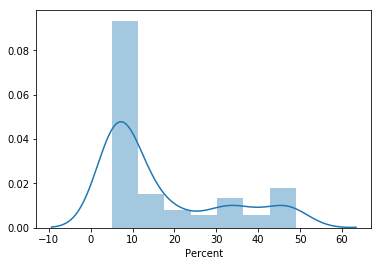

In [24]:
sns.distplot(adapt_cutoff_best_df.Percent)

In [25]:
adapt_cutoff_best_df.ROC_AUC.describe()

count    344.000000
mean       0.891108
std        0.112577
min        0.527083
25%        0.874417
50%        0.933204
75%        0.958496
max        0.999739
Name: ROC_AUC, dtype: float64

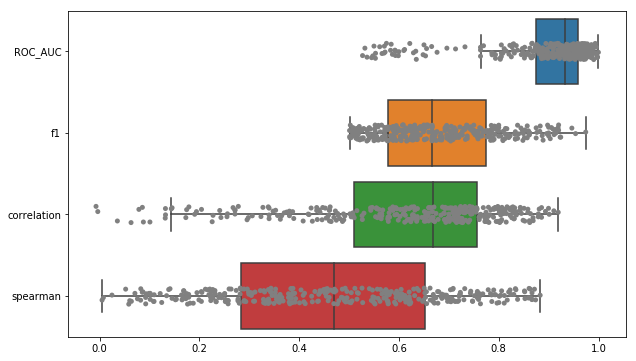

In [26]:
df = adapt_cutoff_best_df[['ROC_AUC','f1', 'correlation', 'spearman']]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.boxplot(data=df, orient='h', ax=axes, showfliers=False)
sns.stripplot(data=df, orient='h', jitter=True, color='gray', ax=axes)
from scipy import stats
#stats.ttest_rel(auc_df.ROC_AUC_a, auc_df.ROC_AUC_f).pvalue

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


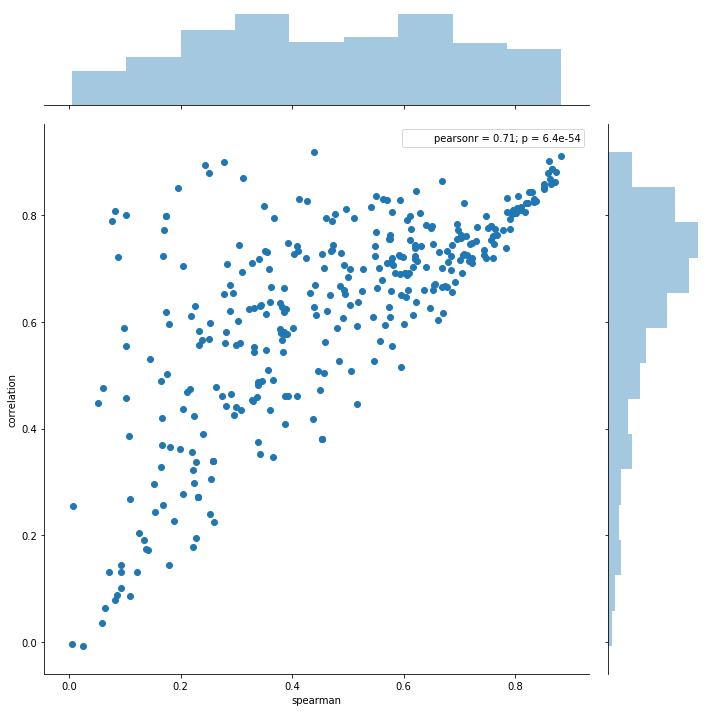

In [27]:
g = sns.jointplot(x="spearman", y="correlation", data=df, size=10)
#g.ax_joint.plot([0.5, 1], [0.5, 1])
plt.show()

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


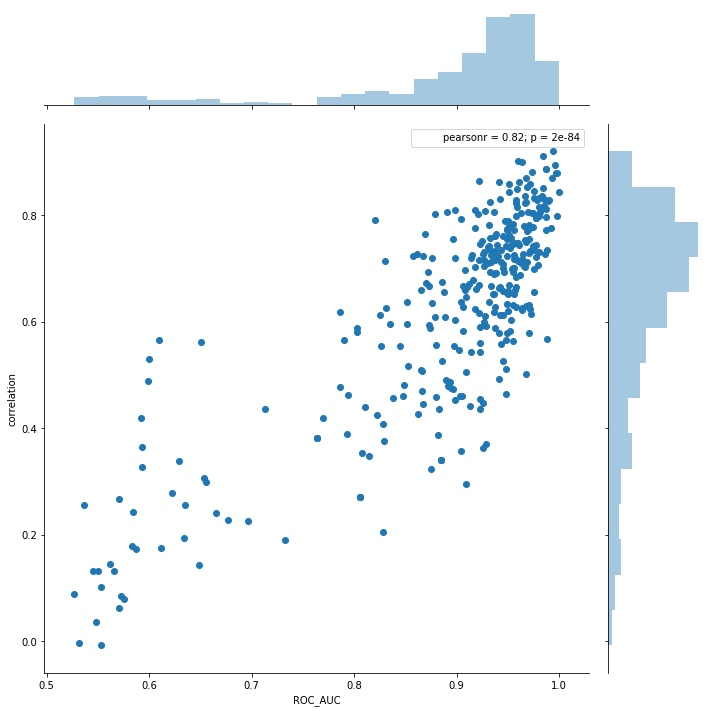

In [28]:
g = sns.jointplot(x="ROC_AUC", y="correlation", data=df, size=10)
#g.ax_joint.plot([0.5, 1], [0.5, 1])
plt.show()

/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/packages/anaconda3/envs/ruse/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


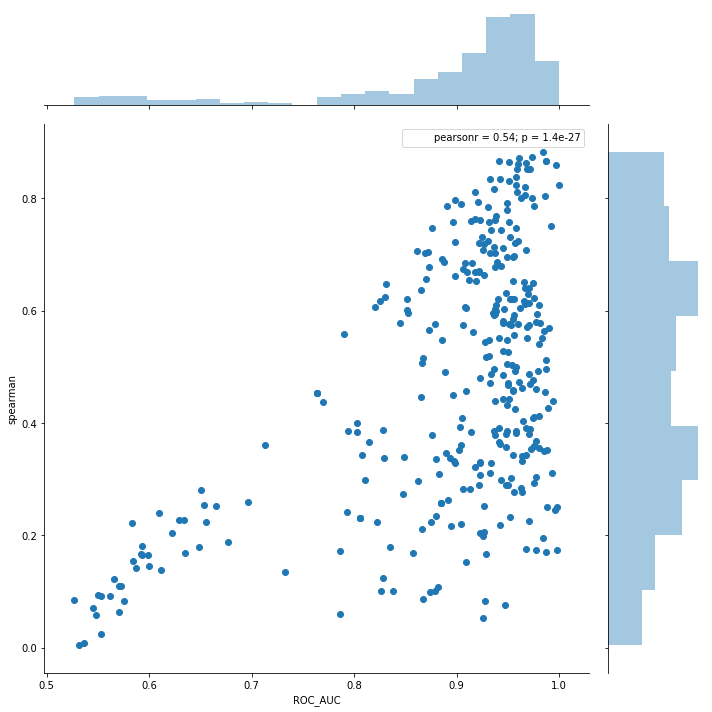

In [29]:
g = sns.jointplot(x="ROC_AUC", y="spearman", data=df, size=10)
#g.ax_joint.plot([0.5, 1], [0.5, 1])
plt.show()